In [ ]:
from mlflow_extra.loggers.code import check_logged_code
from mlflow_extra.loggers.code import append_code
from mlflow_extra.tests.testing_functions import do_something
from mlflow_extra.experiments.utils import get_or_create_experiment
import tempfile
import os
import inspect

In [ ]:
experiment = get_or_create_experiment("example_experiment")

In [ ]:
import mlflow

In [ ]:

run = mlflow.get_run("3bed9459ac104a1baaf011f541afdc28")

In [ ]:
module_name = "mlflow_extra/tests/testing_functions.py"
mlflow.artifacts.download_artifacts(run_id = run.info.run_id,artifact_path=module_name, dst_path=".")

In [ ]:
def add(a,b):
    return a+b

In [ ]:
import os
def append_code(run, func):
    module_name = func.__module__
    with tempfile.TemporaryDirectory() as tmpdirname:
        mlflow.artifacts.download_artifacts(run_id = run.info.run_id, artifact_path= "mlflow_extra/tests/testing_functions.py", dst_path=tmpdirname)
        # print(os.listdir(tmpdirname))
        with open(tmpdirname + "/" + "mlflow_extra/tests/testing_functions.py", "r") as f:
            code = f.read()
            func_code = inspect.getsource(func)
            print(func_code)
            full_code = "\n\n".join([code, func_code])
    return full_code
full_code = append_code(run, add)        


In [ ]:
from pathlib import Path

module_path = Path("mlflow_extra/tests/testing_functions.py")

files = mlflow.artifacts.list_artifacts(run_id = run.info.run_id, artifact_path= module_path.parent)

In [ ]:
[file.path for file in files]

In [ ]:
module_path.as_posix()

In [ ]:
from typing import Union 
from typing import Tuple
from datetime import datetime
from pathlib import Path

def encode_file(name: Union[Path, str]) -> str:
    """
    Encode a name with a timestamp.
    
    :param name: Name to encode.
    :return: Encoded name.
    """
    if isinstance(name, str):
        name = Path(name)

    if isinstance(name, Path):
        if not name.suffix:
            raise ValueError("The file must have a suffix.")
    suffix = name.suffix
    name = name.stem
    timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
    return f"{name}_{timestamp}{suffix}"

def decode_filename(name: Union[str, Path]) -> Tuple[str, datetime]:
    """
    Return the original name and the date from the encoded name.

    :param name: Encoded name.
    :return: Original name and date.
    """
    if isinstance(name, str):
        filename = Path(name)
    if isinstance(filename, Path):
        name = filename.stem
    name_comp = name.split("_")
    name = "_".join(name_comp[:-1]) + filename.suffix
    timestamp = name_comp[-1]
    
    timestamp = datetime.strptime(timestamp, "%Y%m%d%H%M%S")
    return name, timestamp


In [ ]:
path = "another/folder/filename.py"
encoded_name = encode_file(path)

In [ ]:
decoded_name, timestamp = decode_filename(encoded_name) 

In [3]:
from ml_extra.plots.classification import get_roc_curve
from ml_extra.plots.classification import get_precision_recall_curve
from ml_extra.loggers.artifacts.classfication import log_classification_artifacts

from ml_extra.tests.testing_functions import do_something
from ml_extra.experiments.utils import get_or_create_experiment

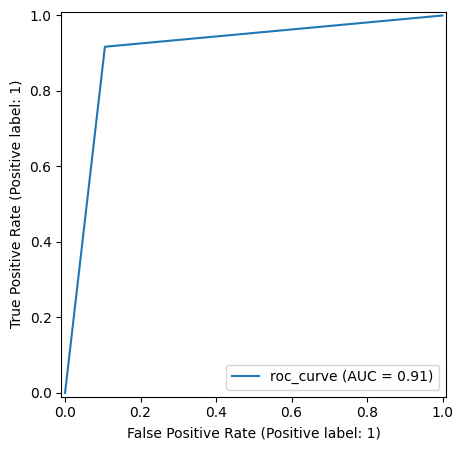

In [5]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x , y = make_classification(n_samples=10000, n_features=10,n_informative=5, n_classes=2)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)    

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

predictions = clf.predict(x_test)
fig = get_roc_curve(y_test, predictions, name="roc_curve")

In [ ]:
experiment = get_or_create_experiment("example_experiment")
with mlflow.start_run(experiment_id=experiment.experiment_id) as run:
    log_classification_artifacts(run, y_test, predictions, x_test, clf, name="classification", path="another/folder/filename.py")
